In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import sys

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Eventing data

1.1. Utilizar sys para añadir al path la ruta donde se encuentran los archivos con nuestra funciones

In [3]:
sys.path.append('/content/drive/MyDrive/CURSO PYTHON/Pre Python/Functions')

1.2. Importa functions con el diminutivo f, recuerda que el archivo functions lo creamos en el video 2.5. Crear nuestras propias librerías, que contiene todas las funciones para el tratamiento del eventing data

In [4]:
import functions as f

1.3. Utilizar la función info_json() y elegir la competición Fifa world cup de la temporada 2018. Guarda el valor de salida de la función en la variable matches y muestra los partidos

In [5]:
df1=f.info_json('/content/drive/MyDrive/CURSO PYTHON/Pre Python/Data/Data/event_data/Statsbomb/data')
df1.head()

**************************************
                Competition
id                         
16         Champions League
37  FA Women's Super League
43           FIFA World Cup
11                  La Liga
49                     NWSL
2            Premier League
72        Women's World Cup 

Que competicion quieres analizar: 43
**************************************
   Season
id       
3    2018 

Que temporada quieres analizar: 3


,home_team,away_team,home_score,away_score,match_date,competition,stage
match_id,,,,,,,
7525,Russia,Saudi Arabia,5,0,2018-06-14,FIFA World Cup,Group Stage
7577,Morocco,Iran,0,1,2018-06-15,FIFA World Cup,Group Stage
7576,Portugal,Spain,3,3,2018-06-15,FIFA World Cup,Group Stage
7578,Egypt,Uruguay,0,1,2018-06-15,FIFA World Cup,Group Stage
7531,Argentina,Iceland,1,1,2018-06-16,FIFA World Cup,Group Stage


1.4. Utiliza la función even_data() para obtener el evento shot  de la final de la Fifa Worl Cup, guarda el resultado de salida en la variable shots

In [6]:
shots=f.event_data('/content/drive/MyDrive/CURSO PYTHON/Pre Python/Data/Data/event_data/Statsbomb/data/events',8658)
shots.head()

['Starting XI' 'Half Start' 'Pass' 'Ball Receipt*' 'Carry' 'Pressure'
 'Duel' 'Miscontrol' 'Clearance' 'Block' 'Ball Recovery' 'Dispossessed'
 'Foul Committed' 'Foul Won' 'Camera On' 'Interception' 'Dribble'
 'Camera off' 'Injury Stoppage' 'Dribbled Past' 'Own Goal For'
 'Own Goal Against' 'Shot' 'Goal Keeper' 'Shield' 'Player Off' 'Player On'
 'Half End' 'Referee Ball-Drop' 'Substitution' 'Error' 'Tactical Shift'] 

Que evento quieres analizar: Shot


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,location_x,location_y,pass_end_location_x,pass_end_location_y,carry_end_location_x,carry_end_location_y,shot_end_location_x,shot_end_location_y,goalkeeper_end_location_x,goalkeeper_end_location_y
723,cfdb23f5-0247-4f10-9641-8ac06824722f,724,1,00:20:51.227,20,51,43,1.013,16,Shot,...,112.0,49.0,NaN,NaN,NaN,NaN,119.0,36.6,NaN,NaN
792,2776f49c-73a8-4185-bcce-9cbef244cf3c,793,1,00:23:34.907,23,34,49,2.053,16,Shot,...,108.0,29.0,NaN,NaN,NaN,NaN,120.0,47.5,NaN,NaN
910,dd524196-386d-4759-b40b-e920cc77b059,911,1,00:27:53.880,27,53,58,0.587,16,Shot,...,105.0,32.0,NaN,NaN,NaN,NaN,120.0,43.6,NaN,NaN
1052,ad19fde7-da37-4430-b1a3-2293ae7c4fff,1053,1,00:37:56.787,37,56,73,0.533,16,Shot,...,108.0,40.0,NaN,NaN,NaN,NaN,120.0,37.6,NaN,NaN
1076,b99d698f-5891-402b-b5cf-33ca81e1554f,1077,1,00:39:25.267,39,25,74,1.000,16,Shot,...,108.0,41.0,NaN,NaN,NaN,NaN,116.0,41.0,NaN,NaN


1.5. Utiliza  value_conts() para  mostrar la siguiente información:\n",
        "\n",
        "- El resultado final de los tiros

*   El resultado final de los tiros
*   El numero de tiros que hizo cada jugador
*   El numero de tiros que hizo cada equipo
*   El xG goal total de Francia, recuerda usar la función para el total.
*   El xG goal total de Croacia



In [7]:
shots.shape

(23, 107)

In [8]:
#Nombre de los tiros
shots.shot_outcome_name

723       Off T
792       Off T
910        Goal
1052       Goal
1076    Wayward
1195    Blocked
1200    Blocked
1230      Off T
1404      Saved
1458      Saved
1463    Wayward
1544      Off T
1647      Saved
1858    Blocked
1862       Goal
1900    Wayward
2006    Blocked
2059       Goal
2170       Goal
2357      Off T
2440    Blocked
2703      Saved
2783      Off T
Name: shot_outcome_name, dtype: object

In [9]:
# Resultado final de los tiros
shots.shot_outcome_name.value_counts()

shot_outcome_name
Off T      6
Goal       5
Blocked    5
Saved      4
Wayward    3
Name: count, dtype: int64

In [10]:
# Nº de tiros de cada jugador
shots.player_name.value_counts()

player_name
Ivan Rakitić            3
Ante Rebić              3
Domagoj Vida            2
Ivan Perišić            2
Antoine Griezmann       2
Dejan Lovren            2
Šime Vrsaljko           2
Kylian Mbappé Lottin    2
Paul Pogba              2
Olivier Giroud          1
Mario Mandžukić         1
Nabil Fekir             1
Name: count, dtype: int64

In [11]:
# Nº de tiros de cada equipo
shots.possession_team_name.value_counts()

possession_team_name
Croatia    15
France      8
Name: count, dtype: int64

In [12]:
# El xG total de Francia
tiros_francia = shots[shots['possession_team_name'] == 'France']
tiros_francia.shot_statsbomb_xg.sum()


1.062986012

In [13]:
# El xG total de Croatia
tiros_croacia = shots[shots['possession_team_name'] == 'Croatia']
tiros_croacia.shot_statsbomb_xg.sum()


1.2536990499999998

2. Visualizar el eventing data\n

2.1. Instala la librería mplsoccer

In [14]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 988.0 kB/s eta 0:00:00


2.2. Importa el método Pitch de mplsoccer

In [15]:
from mplsoccer.pitch import Pitch, VerticalPitch

2.3. Raliza el código necesario para obtener esta imagen

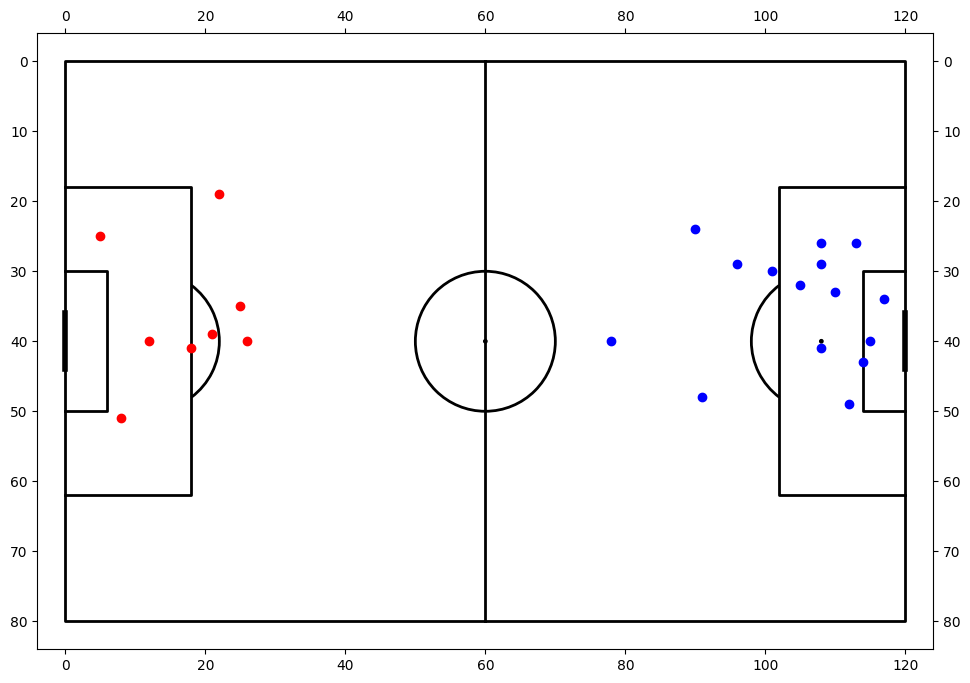

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
pitch = Pitch(pitch_color='white', line_color='black',tick=True, axis=True, label=True)
pitch.draw(ax=ax)

for i in range(len(shots)):

  if shots.team_name.values[i] == 'France':
    pitch.scatter(120 - shots.location_x.values[i], 80 - shots.location_y.values[i], ax=ax, color='red')

  elif shots.team_name.values[i] == 'Croatia':
    pitch.scatter(shots.location_x.values[i], shots.location_y.values[i], ax=ax, color='blue')

3. Algoritmo Kmeans

3.1. Importa el Algoritmo Kmeans

In [17]:
from sklearn.cluster import KMeans

3.2. Importa los datos ``team_passes_20.csv`` de la carpet clean_data y realiza un .head()

In [18]:
df = pd.read_csv('/content/drive/MyDrive/CURSO PYTHON/Pre Python/Data/Data/clean_data/team_passes_20.csv')
df.head()

,Squad,# Pl,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp_short,Att_short,...,Att_long_VS,Cmp%_long_VS,Ast_VS,xA_VS,A-xA_VS,KP_VS,1/3_VS,PPA_VS,CrsPA_VS,Prog_VS
0,Alavés,32,38.0,9724,13753,70.7,207059,86512,3828,4695,...,4164,61.1,36,32.3,4.7,322,1161,299,83,1280
1,Athletic Club,26,38.0,12589,16607,75.8,263278,92587,4837,5640,...,3893,55.8,26,30.8,-4.8,281,987,261,85,1119
2,Atlético Madrid,30,38.0,13709,17595,77.9,257089,96920,6091,6947,...,4309,61.2,15,20.5,-5.5,283,1166,237,82,1155
3,Barcelona,28,38.0,24981,28212,88.5,447366,126905,11376,12316,...,3011,55.3,21,22.2,-1.2,254,763,220,65,843
4,Betis,27,38.0,16291,19618,83.0,318743,95412,6579,7296,...,3641,55.8,40,31.8,8.2,311,872,285,91,1014


3.3. Realiza el algoritmo Kmeans con 7 clusters, deja el valor de random_state=1

In [19]:
cluster = KMeans(random_state=1, n_clusters=7)

3.4. Entrena el modelo para las columnas ``'Cmp_short'`` y ``'Cmp_long'

In [20]:
def explore_cluster(df, n_cluster, cols, pos=None):

  cluster = KMeans(n_clusters=n_cluster, random_state=1)

  if pos != None:
    df[df.Pos == pos]

  cluster.fit(df[cols])
  df['cluster'] = cluster.labels_.astype('str')
  df_group = df.groupby('cluster')[cols].mean()

  sns.set()

  if len(cols) == 1:

    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x='cluster', y=cols[0])

  elif len(cols) == 2:

    plt.figure(figsize=(12,8))
    sns.scatterplot(data=df, x=cols[0], y=cols[1], hue='cluster')

  elif len(cols) == 3:

    fig = px.scatter_3d(df, x=cols[0], y=cols[1], z=cols[2], color='cluster')
    fig.show()

  return df_group, df

In [26]:
modelo_entrenado=cluster.fit(df[['Cmp_short','Cmp_long']])
modelo_entrenado

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

3.5. Crea la columna cluster y añade el valor de los clusters, recuerda hacer la transformación para que esté en formato categórico.

In [29]:
df['cluster'] = modelo_entrenado.labels_.astype('str')

In [30]:
print(df.head())

             Squad  # Pl   90s    Cmp    Att  Cmp%  TotDist  PrgDist  \
0           Alavés    32  38.0   9724  13753  70.7   207059    86512   
1    Athletic Club    26  38.0  12589  16607  75.8   263278    92587   
2  Atlético Madrid    30  38.0  13709  17595  77.9   257089    96920   
3        Barcelona    28  38.0  24981  28212  88.5   447366   126905   
4            Betis    27  38.0  16291  19618  83.0   318743    95412   

   Cmp_short  Att_short  ...  Cmp%_long_VS  Ast_VS  xA_VS  A-xA_VS  KP_VS  \
0       3828       4695  ...          61.1      36   32.3      4.7    322   
1       4837       5640  ...          55.8      26   30.8     -4.8    281   
2       6091       6947  ...          61.2      15   20.5     -5.5    283   
3      11376      12316  ...          55.3      21   22.2     -1.2    254   
4       6579       7296  ...          55.8      40   31.8      8.2    311   

   1/3_VS  PPA_VS  CrsPA_VS  Prog_VS  cluster  
0    1161     299        83     1280        2  
1     98

3.6. Realiza el groupby para ver el valor promedio de cada cluster y las dos métricas

In [33]:
df.groupby(['cluster'])[['Cmp_short','Cmp_long']].mean().sort_values(by=['Cmp_short', 'Cmp_long'],ascending=False)

,Cmp_short,Cmp_long
cluster,,
3,11376.000,2786.000
1,9088.000,3071.000
0,6059.875,2344.625
2,4227.200,1969.500


3.7. Visualiza con con la librería seaborn un scatter plot, recuerda añadir el color de cada punto en función del cluster al que pertenece. Utiliza un bucle for junto con plt.annotate() para añadir el nombre de los equipos al gráfico, esto lo puedes encontrar en el video 3.4 Añadir texto al gráfico, del módulo 2.

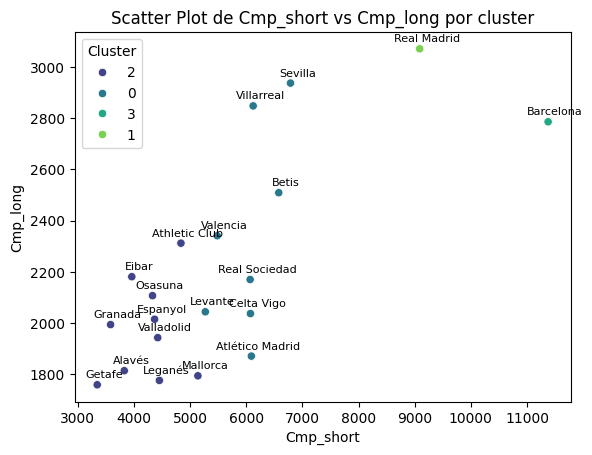

In [35]:
sns.scatterplot(x='Cmp_short', y='Cmp_long', hue='cluster', data=df, palette='viridis')

# añadir nombre de los equipo al grafico
for i, equipo in enumerate(df['Squad']):
    plt.annotate(equipo, (df['Cmp_short'][i], df['Cmp_long'][i]), textcoords='offset points', xytext=(5, 5), ha='center', fontsize=8)

plt.xlabel('Cmp_short')
plt.ylabel('Cmp_long')
plt.title('Scatter Plot de Cmp_short vs Cmp_long por cluster')
plt.legend(title='Cluster')
plt.show()

3.8. Realiza los mismos procedimientos anteriores que hicimos en la creación del cluster pero con las 3 métricas ``'Cmp_short'``, ``'Cmp_long'``, ``'PrgDist'``.Esta vez todo en una celda, desde la creación del cluster hasta mostrar el .groupby()

In [36]:
cluster = KMeans(random_state=1, n_clusters=7)

# seleccionar las columnas para entrenar el modelo
columnas_entrenamiento = ['Cmp_short', 'Cmp_long', 'PrgDist']
df_entrenamiento = df[columnas_entrenamiento]

# entrenar el modelo KMeans
modelo_entrenado = cluster.fit(df_entrenamiento)

# añadir la columnas 'cluster' al dataframe df
df['cluster'] = modelo_entrenado.labels_

# convertir la columna 'cluster' a formato categórico.
df['cluster'] = df['cluster'].astype('category')

# Mostrar el valor promedio de cada metrica por cluster
promedio_por_cluster = df.groupby('cluster')[['Cmp_short', 'Cmp_long', 'PrgDist']].mean().round(2)

print(promedio_por_cluster)

         Cmp_short  Cmp_long    PrgDist
cluster                                
0          5128.50   2125.00   92069.25
1         11376.00   2786.00  126905.00
2          6096.00   2509.00  102239.50
3          3951.75   1868.00   82333.75
4          7938.00   3004.00  112122.00
5          4324.25   1951.00   87605.25
6          6051.00   2240.33   96008.67


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.9. Realiza un gráfico en 3D con la librería plotly de las tres métricas, añade el color en función del cluster y el nombre de los equipos al gráfico

In [37]:
fig = px.scatter_3d(df, x='Cmp_short', y='Cmp_long', z='PrgDist', color='cluster', hover_name='Squad',
labels={'Cmp_short': 'Cmp_short', 'Cmp_long': 'Cmp_long', 'PrgDist': 'PrgDist', 'cluster': 'Cluster'})

fig.show()